# Simulating pore with varying tether length and sequences

In [1]:
'''
Initialise functions for plotting and processing data
'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Video


#centre of barrel
xc = (61.5 + 38.5)/2
yc = 50
zc = 50
lengthToNm = 0.8518 
timeTons   = 3.03e-3

def getPoreNt(teth_len):
    scaf_start = 0
    scaf_end   = 593-40 + teth_len*2
    return np.arange(teth_len + scaf_start, scaf_end - teth_len)
    

def RMS(x, y, z):
    #takes a vector (e.g. velocity) broken into components x,y,z and returns the RMS value
    return np.sqrt(x**2 + y**2 + z**2)


def getPosition(data, nt, pos, vel, rot):
    #takes data and returns position in nm relative to centre of barrel
    xpos = data[:,0 + 3*nt*(pos + vel + rot)] 
    ypos = data[:,1 + 3*nt*(pos + vel + rot)] 
    zpos = data[:,2 + 3*nt*(pos + vel + rot)] 
    xpos = (xpos - xc)*lengthToNm
    ypos = (ypos - yc)*lengthToNm
    zpos = (zpos - zc)*lengthToNm
    return [xpos, ypos, zpos]

def getVelocity(data, nt, pos, vel, rot):
    #takes data and returns velocity in nm/ns relative to centre of barrel
    xvel = data[:,3 + 3*nt*(pos + vel + rot)] 
    yvel = data[:,4 + 3*nt*(pos + vel + rot)] 
    zvel = data[:,5 + 3*nt*(pos + vel + rot)] 
    xvel = xvel*lengthToNm/timeTons
    yvel = yvel*lengthToNm/timeTons
    zvel = zvel*lengthToNm/timeTons
    return [xvel, yvel, zvel]


def getAngularV(data, nt, pos, vel, rot):
    #takes data and returns angular velocity in 1/ns relative to centre of barrel
    xrot = data[:,6 + 3*nt*(pos + vel + rot)] 
    yrot = data[:,7 + 3*nt*(pos + vel + rot)] 
    zrot = data[:,8 + 3*nt*(pos + vel + rot)] 
    xrot = xrot/timeTons/np.pi*180
    yrot = yrot/timeTons/np.pi*180
    zrot = zrot/timeTons/np.pi*180
    return [xrot, yrot, zrot]


def takeMean(Vec):
    #given a list takes the mean along each coordinate
    for i in range(len(Vec)):
        Vec[i] = np.mean(Vec[i],1)
    return Vec


def cartToCyl(x,y,z):
    #converts Cartesian coords to cylindrical coordinates in degrees
    r     = np.sqrt(x**2 + y**2)
    theta = np.arctan(y/x)/np.pi*180
    return [r, theta, z]


def plotPositionHist(posV, pType = 'z'):
    '''
    plots the histogram of a spatial or angular coordinate
    posV is the position vector
    pType = 'x', 'y', 'z', 't' (theta), 'r' (radial)
    '''   
    plt.figure()
    plt.xlabel('Position (nm)')
    if pType == 'x':
        pos = posV[0]
        plt.title('Histogram of location of pore - x-position')
    elif pType == 'y':
        pos = posV[1]
        plt.title('Histogram of location of pore - y-position')        
    elif pType == 'z':
        pos = posV[2]
        plt.title('Histogram of location of pore - z-position')
    elif pType == 'r':
        pos = np.sqrt(posV[0]**2 + posV[1]**2)
        plt.title('Histogram of location of pore - r-position')
        plt.xlabel('Radial distance from centre of pore (nm)')
    elif pType == 't':
        pos = np.arctan(posV[1]/posV[0])/np.pi*180     
        plt.title('Histogram of location of pore - angular distance of pore in barrel')
        plt.xlabel('Angular distance of pore in barrel (degrees)')

    plt.hist(pos, density = True)
    plt.ylabel('Probability density')
    plt.show()

    
    
def plotRMSHist(Vec, pType = 'vel'):
    '''
    plots the histogram of a spatial or angular coordinate
    Vec is a vector: either position, velocity or angular velocity
    pType = 'pos', 'vel', 'rot'
    '''       
    RMSVec = RMS(Vec[0], Vec[1], Vec[2])
    plt.figure()
    plt.hist(RMSVec, density = True)
    plt.ylabel('Probability density')

    if pType == 'pos':
        plt.xlabel('Average root mean squared position (nm)')
        plt.title('Histogram of average root mean squared position')
    elif pType == 'vel':
        plt.xlabel('Average root mean squared velocity (nm/ns)')
        plt.title('Histogram of average root mean squared velocity')
    elif pType == 'rot':
        plt.xlabel('Average root mean squared angular velocity (degrees/ns)')
        plt.title('Histogram of average root mean squared angular velocity')
    plt.show()    
 

def plotMeanStdPair(xval, Means, Stds, ylabel1 = '', ylabel2 = '', xlabel = 'Tether length (bp)', title = ''):
    plt.figure()
    fig, ax1 = plt.subplots()
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1, color='b')
    ax1.plot(xval, Means, 'bo')
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel(ylabel2, color='r')  
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.plot(xval, Stds, 'rx')
    plt.title(title)
    fig.tight_layout() 
    plt.show()

In [2]:
teth_len = []
mean_z   = []
mean_r   = []
mean_th  = []
mean_vel = []
mean_rot = []

std_z   = []
std_r   = []
std_th  = []
std_vel = []
std_rot = []

In [3]:
'''
Import data for tether length 15
'''

data = np.genfromtxt('len15/ogSeq/outMD.txt')

#nucleotide to track
nt = getPoreNt(10)

#Get positions
posV = takeMean(getPosition(data, nt, 1, 1, 1))

#Get velocities
velV = takeMean(getVelocity(data, nt, 1, 1, 1))

#Get angular velocities
rotV = takeMean(getAngularV(data, nt, 1, 1, 1))

#Plot histograms
plotPositionHist(posV, 'z')
plotPositionHist(posV, 'r')
plotPositionHist(posV, 't')

#Save means and standard deviations
teth_len.append(20)
mean_z.append(np.mean(posV[2]))
mean_r.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[0]))
mean_th.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_z.append(np.std(posV[2]))
std_r.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_th.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))

OSError: len15/ogSeq/outMD.txt not found.

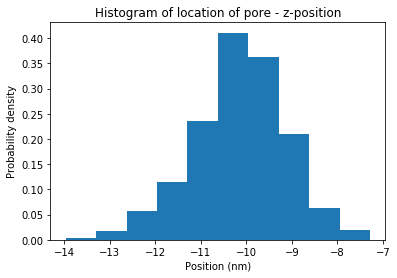

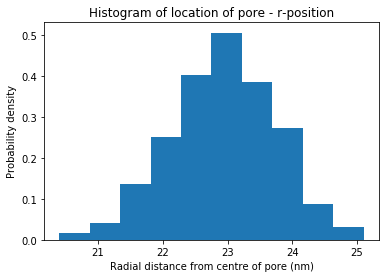

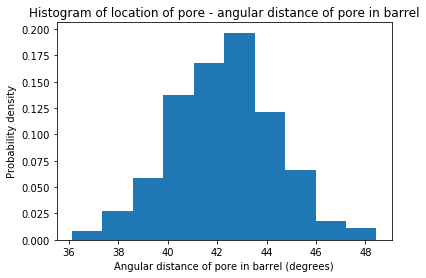

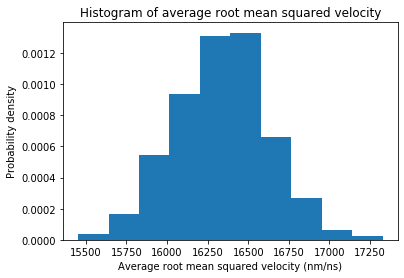

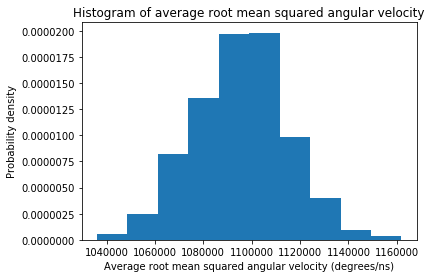

In [13]:
'''
Import data for tether length 30
'''
data = np.genfromtxt('len30/outMD.txt')

#nucleotide to track
nt = getPoreNt(30)

#Get positions
posV = takeMean(getPosition(data, nt, 1, 1, 1))

#Get velocities
velV = takeMean(getVelocity(data, nt, 1, 1, 1))

#Get angular velocities
rotV = takeMean(getAngularV(data, nt, 1, 1, 1))

#Plot histograms
plotPositionHist(posV, 'z')
plotPositionHist(posV, 'r')
plotPositionHist(posV, 't')
plotRMSHist(velV, 'vel')
plotRMSHist(rotV, 'rot')

#Save means and standard deviations
teth_len.append(30)
mean_z.append(np.mean(posV[2]))
mean_r.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[0]))
mean_th.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[1]))
mean_vel.append(np.mean(RMS(velV[0],velV[1],velV[2])))
mean_rot.append(np.mean(RMS(rotV[0],rotV[1],rotV[2])))
std_z.append(np.std(posV[2]))
std_r.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_th.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_vel.append(np.std(RMS(velV[0],velV[1],velV[2])))
std_rot.append(np.std(RMS(rotV[0],rotV[1],rotV[2])))

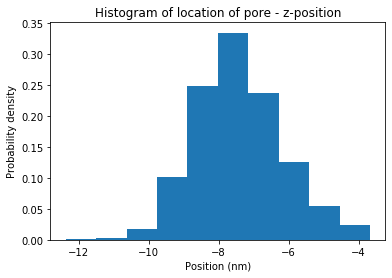

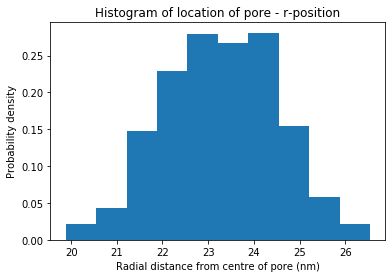

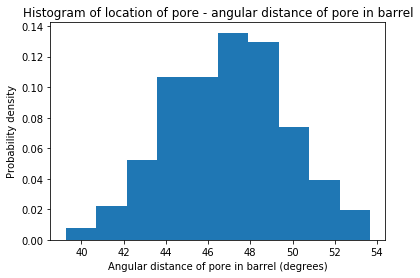

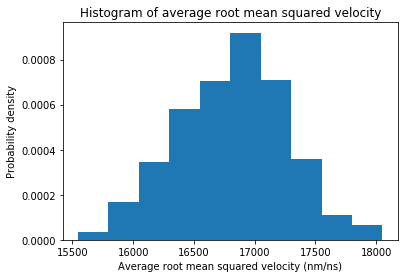

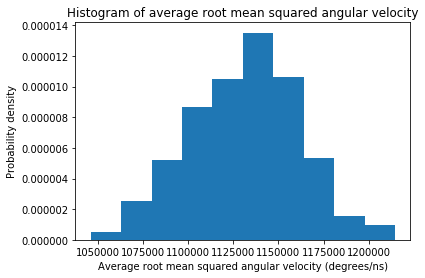

In [14]:
'''
Import data for tether length 40
'''
data = np.genfromtxt('len40/outMD.txt')

#nucleotide to track
nt = getPoreNt(40)

#Get positions
posV = takeMean(getPosition(data, nt, 1, 1, 1))

#Get velocities
velV = takeMean(getVelocity(data, nt, 1, 1, 1))

#Get angular velocities
rotV = takeMean(getAngularV(data, nt, 1, 1, 1))

#Plot histograms
plotPositionHist(posV, 'z')
plotPositionHist(posV, 'r')
plotPositionHist(posV, 't')
plotRMSHist(velV, 'vel')
plotRMSHist(rotV, 'rot')

#Save means and standard deviations
teth_len.append(40)
mean_z.append(np.mean(posV[2]))
mean_r.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[0]))
mean_th.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[1]))
mean_vel.append(np.mean(RMS(velV[0],velV[1],velV[2])))
mean_rot.append(np.mean(RMS(rotV[0],rotV[1],rotV[2])))
std_z.append(np.std(posV[2]))
std_r.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_th.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_vel.append(np.std(RMS(velV[0],velV[1],velV[2])))
std_rot.append(np.std(RMS(rotV[0],rotV[1],rotV[2])))

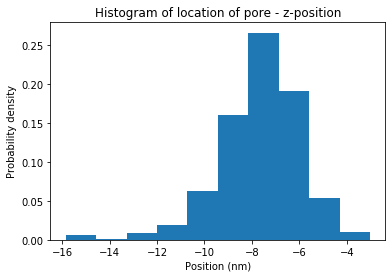

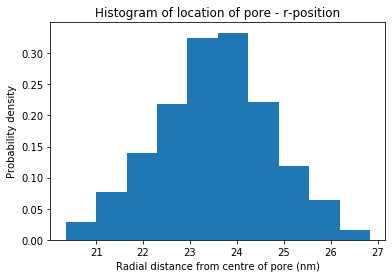

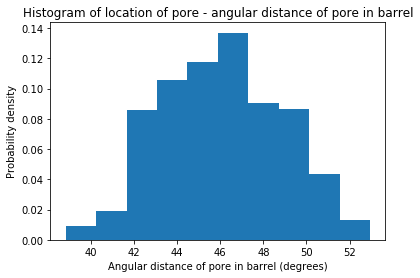

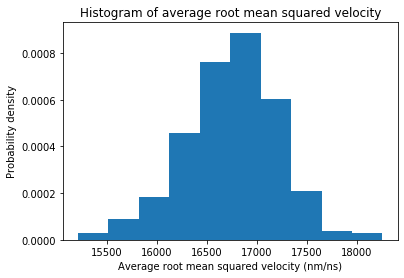

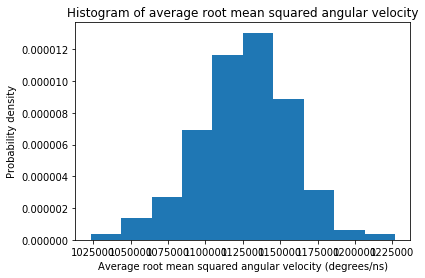

In [15]:
'''
Import data for tether length 50
'''
data = np.genfromtxt('len50/outMD.txt')

#nucleotide to track
nt = getPoreNt(50)

#Get positions
posV = takeMean(getPosition(data, nt, 1, 1, 1))

#Get velocities
velV = takeMean(getVelocity(data, nt, 1, 1, 1))

#Get angular velocities
rotV = takeMean(getAngularV(data, nt, 1, 1, 1))

#Plot histograms
plotPositionHist(posV, 'z')
plotPositionHist(posV, 'r')
plotPositionHist(posV, 't')
plotRMSHist(velV, 'vel')
plotRMSHist(rotV, 'rot')

#Save means and standard deviations
teth_len.append(50)
mean_z.append(np.mean(posV[2]))
mean_r.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[0]))
mean_th.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[1]))
mean_vel.append(np.mean(RMS(velV[0],velV[1],velV[2])))
mean_rot.append(np.mean(RMS(rotV[0],rotV[1],rotV[2])))
std_z.append(np.std(posV[2]))
std_r.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_th.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_vel.append(np.std(RMS(velV[0],velV[1],velV[2])))
std_rot.append(np.std(RMS(rotV[0],rotV[1],rotV[2])))

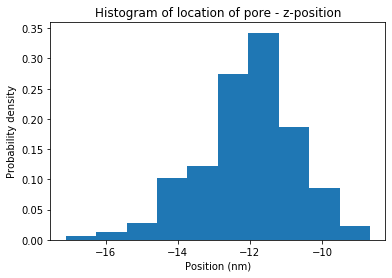

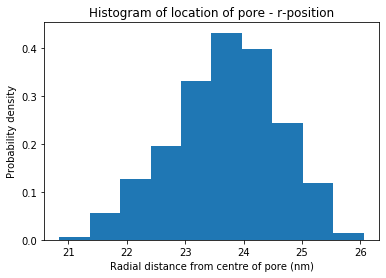

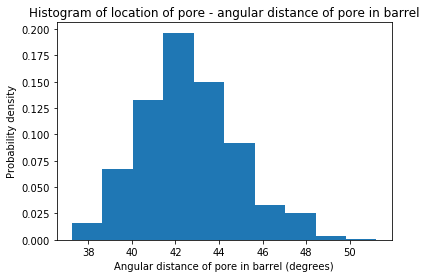

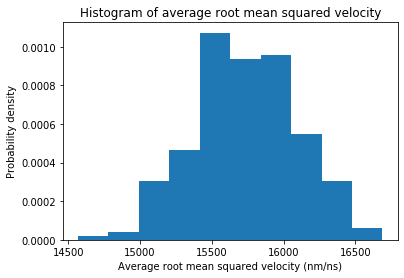

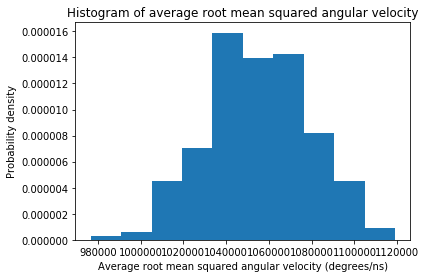

In [16]:
'''
Import data for tether length 60
'''
data = np.genfromtxt('len60/outMD.txt')

#nucleotide to track
nt = getPoreNt(60)

#Get positions
posV = takeMean(getPosition(data, nt, 1, 1, 1))

#Get velocities
velV = takeMean(getVelocity(data, nt, 1, 1, 1))

#Get angular velocities
rotV = takeMean(getAngularV(data, nt, 1, 1, 1))

#Plot histograms
plotPositionHist(posV, 'z')
plotPositionHist(posV, 'r')
plotPositionHist(posV, 't')
plotRMSHist(velV, 'vel')
plotRMSHist(rotV, 'rot')

#Save means and standard deviations
teth_len.append(60)
mean_z.append(np.mean(posV[2]))
mean_r.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[0]))
mean_th.append(np.mean(cartToCyl(posV[0],posV[1],posV[2])[1]))
mean_vel.append(np.mean(RMS(velV[0],velV[1],velV[2])))
mean_rot.append(np.mean(RMS(rotV[0],rotV[1],rotV[2])))
std_z.append(np.std(posV[2]))
std_r.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_th.append(np.std(cartToCyl(posV[0],posV[1],posV[2])[1]))
std_vel.append(np.std(RMS(velV[0],velV[1],velV[2])))
std_rot.append(np.std(RMS(rotV[0],rotV[1],rotV[2])))

<Figure size 432x288 with 0 Axes>

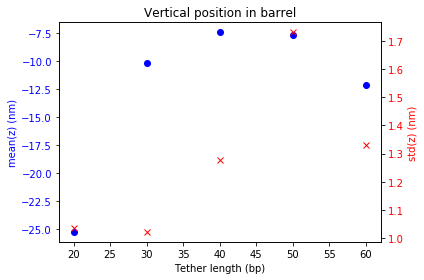

<Figure size 432x288 with 0 Axes>

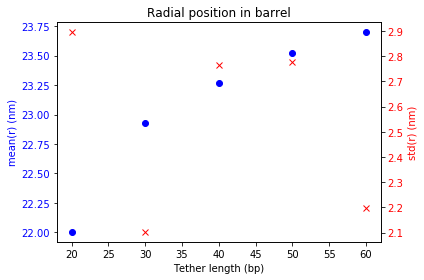

<Figure size 432x288 with 0 Axes>

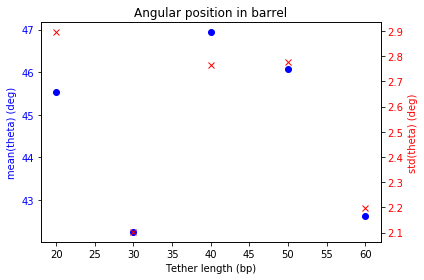

<Figure size 432x288 with 0 Axes>

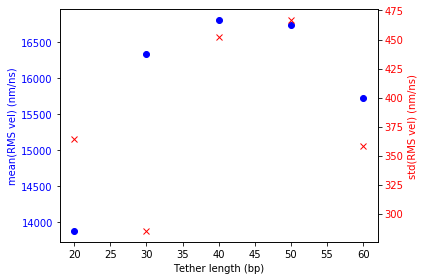

<Figure size 432x288 with 0 Axes>

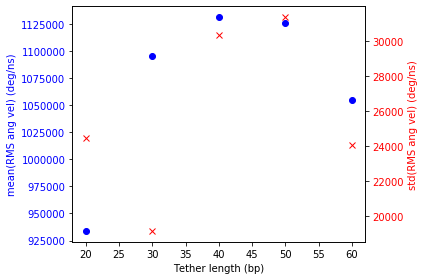

In [17]:
'''
Comparison between the different pores
'''

plotMeanStdPair(teth_len, mean_z, std_z, ylabel1 = 'mean(z) (nm)', ylabel2 = 'std(z) (nm)', title = 'Vertical position in barrel')
plotMeanStdPair(teth_len, mean_r, std_r, ylabel1 = 'mean(r) (nm)', ylabel2 = 'std(r) (nm)', title = 'Radial position in barrel')
plotMeanStdPair(teth_len, mean_th, std_th, ylabel1 = 'mean(theta) (deg)', ylabel2 = 'std(theta) (deg)', title = 'Angular position in barrel')
plotMeanStdPair(teth_len, mean_vel, std_vel, ylabel1 = 'mean(RMS vel) (nm/ns)', ylabel2 = 'std(RMS vel) (nm/ns)', title = '')
plotMeanStdPair(teth_len, mean_rot, std_rot, ylabel1 = 'mean(RMS ang vel) (deg/ns)', ylabel2 = 'std(RMS ang vel) (deg/ns)', title = '')

# Conclusions



# Future work
- Running longer simulation (and also using Monte Carlo) will allow a better sampling of the space that the pore can move. Better statistics will give us a better understanding of how the pore behaves. 
    - Then considering the distributions of some of these quantities are assymetric, so clearly not Gaussian I can complement comparison of mean and standard deviation by the parameters of the relevant probability distribution. 
- I was using random sequences so I can try varying the tether sequence, and using the actually used sequences.
- Also soon I will try this with cinches / handles to see if I can explain why the cinches weren't very effective. 